# Task 2. Investigating Relationships (part 1)

Analyze the data on Global AI Job Market & Salary Trends 2025.

[Source](https://www.kaggle.com/datasets/bismasajjad/global-ai-job-market-and-salary-trends-2025)

The file `ai_job_dataset.csv` contains the following variables:

| Variable name | Variable description
|:-------------------:|:------------------:|
| job_id | Unique identifier for each job posting |
| job_title | Standardized job title |
| salary_usd | Annual salary in USD|
| salary_currency | Original salary currency|
| salary_local | Salary in local currency|
| experience_level | EN (Entry), MI (Mid), SE (Senior), EX (Executive)|
| employment_type |	FT (Full-time), PT (Part-time), CT (Contract), FL (Freelance)|
| company_location | Country where company is located|
| company_size | S (Small <50), M (Medium 50-250), L (Large >250)|
| employee_residence |	Country where employee resides|
| remote_ratio | 0 (No remote), 50 (Hybrid), 100 (Fully remote)|
| required_skills |	Top 5 required skills (comma-separated)|
| education_required |	Minimum education requirement|
| years_experience | Required years of experience|
| industry | Industry sector of the company |
| posting_date | Date when job was posted |
| application_deadline | Application deadline |
| job_description_length | Character count of job description |
| benefits_score |	Numerical score of benefits package (1-10) |

Please complete the following tasks.

**1. For interval or ratio scale variables run suitable normality tests to check whether their distribution is close to the normal distribution. Formulate hypothesis. Create graphs to compare the variables’ distributions with the normal distribution. Make conclusions.**

In [94]:
import pandas as pd
from scipy import stats
from scipy.stats import kstest, norm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import math
from math import sqrt
import seaborn as sns

df = pd.read_csv('ai_job_dataset.csv')

In [12]:
# Install the pingouin library for partial correlation (if needed)
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 12.9 MB/s eta 0:00:00


In [6]:
df

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,AI14996,Robotics Engineer,38604,USD,EN,FL,Finland,S,Finland,50,"Java, Kubernetes, Azure",Bachelor,1,Energy,2025-02-06,2025-03-25,1635,7.9,Advanced Robotics
14996,AI14997,Machine Learning Researcher,57811,GBP,EN,CT,United Kingdom,M,United Kingdom,0,"Mathematics, Docker, SQL, Deep Learning",Master,0,Government,2024-10-16,2024-10-30,1624,8.2,Smart Analytics
14997,AI14998,NLP Engineer,189490,USD,EX,CT,South Korea,L,South Korea,50,"Scala, Spark, NLP",Associate,17,Manufacturing,2024-03-19,2024-05-02,1336,7.4,AI Innovations
14998,AI14999,Head of AI,79461,EUR,EN,FT,Netherlands,M,Netherlands,0,"Java, Computer Vision, Python, TensorFlow",PhD,1,Real Estate,2024-03-22,2024-04-23,1935,5.6,Smart Analytics


In [38]:
interval_variable = ["salary_usd", "remote_ratio", "years_experience", "job_description_length", "benefits_score"]
df[interval_variable]

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
0,90376,50,9,1076,5.9
1,61895,100,1,1268,5.2
2,152626,0,2,1974,9.4
3,80215,50,7,1345,8.6
4,54624,100,0,1989,6.6
...,...,...,...,...,...
14995,38604,50,1,1635,7.9
14996,57811,0,0,1624,8.2
14997,189490,50,17,1336,7.4
14998,79461,0,1,1935,5.6


/tmp/ipython-input-1085755175.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var].dropna(), ax=ax, fit=norm)
/tmp/ipython-input-1085755175.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var].dropna(), ax=ax, fit=norm)
/tmp/ipython-input-1085755175.py:15: UserWarning: 

`distplo

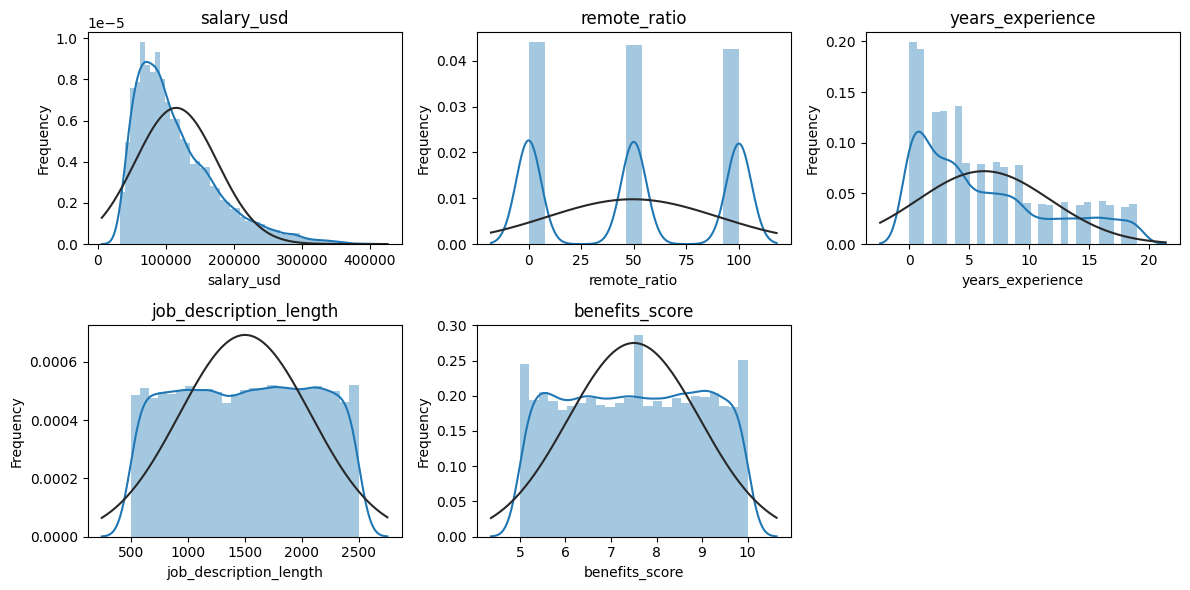

In [41]:
from scipy.stats import norm

vars = interval_variable
n = len(vars)
ncols = 3
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*3))
axes = axes.flatten()

for i, var in enumerate(vars):
    ax = axes[i]
    # ax.hist(df[var].dropna(), bins=20)

    sns.distplot(df[var].dropna(), ax=ax, fit=norm)

    ax.set_title(var)
    ax.set_ylabel('Frequency')

for ax in axes[n:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

In [71]:
print("USD Salary:")
stats.kstest(df['salary_usd'].dropna(),
             'norm', args=(df['salary_usd'].dropna().mean(),
                           df['salary_usd'].dropna().std()))

USD Salary:


KstestResult(statistic=np.float64(0.10626835038303684), pvalue=np.float64(5.844235961240087e-148), statistic_location=np.int64(103942), statistic_sign=np.int8(1))

In [75]:
print("Remote Ratio:")
stats.kstest(df['remote_ratio'].dropna(),
             'norm', args=(df['remote_ratio'].dropna().mean(),
                           df['remote_ratio'].dropna().std()))

Remote Ratio:


KstestResult(statistic=np.float64(0.22566306525935942), pvalue=np.float64(0.0), statistic_location=np.int64(0), statistic_sign=np.int8(1))

In [74]:
print("year experience:")
stats.kstest(df['years_experience'].dropna(),
             'norm', args=(df['years_experience'].dropna().mean(),
                           df['years_experience'].dropna().std()))

year experience:


KstestResult(statistic=np.float64(0.15766923055616455), pvalue=np.float64(0.0), statistic_location=np.int64(4), statistic_sign=np.int8(1))

In [76]:
print("job description lenght:")
stats.kstest(df['job_description_length'].dropna(),
             'norm', args=(df['job_description_length'].dropna().mean(),
                           df['job_description_length'].dropna().std()))

**job description lenght:**


KstestResult(statistic=np.float64(0.05852337567631799), pvalue=np.float64(4.237746631483511e-45), statistic_location=np.int64(1039), statistic_sign=np.int8(1))

In [72]:
print("benefit score:")
stats.kstest(df['benefits_score'].dropna(),
             'norm', args=(df['benefits_score'].dropna().mean(),
                           df['benefits_score'].dropna().std()))

benefit score:


KstestResult(statistic=np.float64(0.06967023471149358), pvalue=np.float64(9.379345105966171e-64), statistic_location=np.float64(8.5), statistic_sign=np.int8(-1))

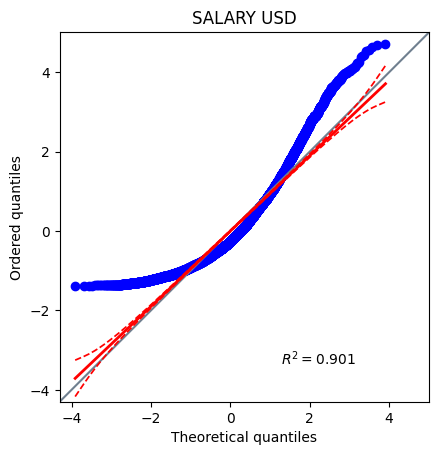

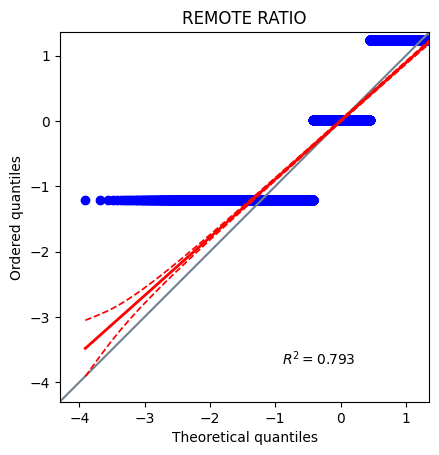

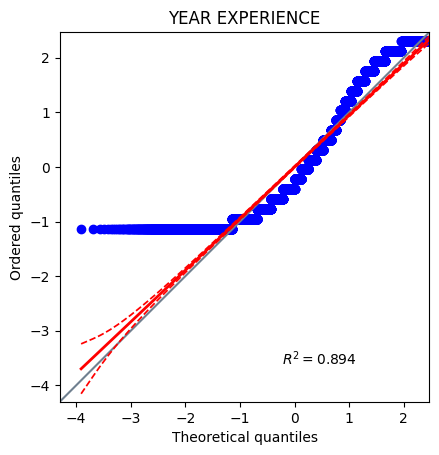

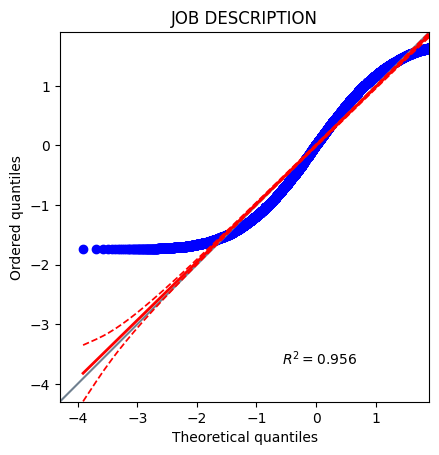

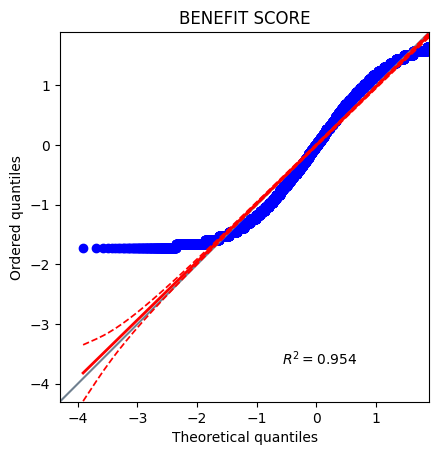

In [70]:
pg.qqplot(df['salary_usd'], dist='norm')
plt.title('SALARY USD')
plt.show()

pg.qqplot(df['remote_ratio'], dist = 'norm')
plt.title('REMOTE RATIO')
plt.show()

pg.qqplot(df['years_experience'], dist = 'norm')
plt.title('YEAR EXPERIENCE')
plt.show()

pg.qqplot(df['job_description_length'], dist = 'norm')
plt.title('JOB DESCRIPTION')
plt.show()

pg.qqplot(df['benefits_score'], dist = 'norm')
plt.title('BENEFIT SCORE')
plt.show()

**HYPOTHESIS after comparation**
* `Salary USD`
p-value < 0.05, H0 is rejected, H1 is not rejected => the distribution of salary_usd is significantly different from normal

* `Years of experience`
p-value < 0.05, H0 is rejected, H1 is not rejected => the distribution of years_experience is significantly different from normal

* `Job description length`
p-value < 0.05, H0 is rejected, H1 is not rejected => the distribution of job_description_length is significantly different from normal


* `Remote ratio`
as p-value < 0.05, H0 is rejected, H1 is not rejected => the distribution of remote_ratio is significantly different from normal

* `Benefits score`
p-value < 0.05, H0 is rejected, H1 is not rejected => the distribution of benefits_score is significantly different from normal

**Job description length is found out to be close to normal**

**2. Run a chi-square test to analyze the relationship between categorical variables. You can take the existing variables or create new categorical variables based on interval or ratio scale variables. Explain why the chi-square test is applicable to analyze the relationship between the selected pairs of variables. Create a contingency table based on these variables and describe the tendencies that you can observe in frequency distribution. Formulate hypotheses for the chi-square test, interpret the results of analysis and make conclusions. Create a suitable graph to demonstrate the relationship between the selected variables.**

**Relationship test**

are higher education level categories more frequent for senior or executive roles?

-----------------------------
hypotheses for the chi-square test:
* Null Hypothesis (H0): There is no significant association between {var1} and {var2}.
* Alternative Hypothesis (H1): There is a significant association between {var1} and {var2}.


In [78]:
ct_com_rem = pd.crosstab(df['experience_level'], df['education_required'])
ct_com_rem

education_required,Associate,Bachelor,Master,PhD
experience_level,,,,
EN,938,943,896,941
EX,947,956,1000,857
MI,976,948,927,930
SE,924,942,925,950


In [79]:
stats.chi2_contingency(ct_com_rem)

Chi2ContingencyResult(statistic=np.float64(13.24800282653626), pvalue=np.float64(0.15170174097796296), dof=9, expected_freq=array([[938.17533333, 939.1668    , 929.00426667, 911.6536    ],
       [948.77333333, 949.776     , 939.49866667, 921.952     ],
       [954.07233333, 955.0806    , 944.74586667, 927.1012    ],
       [943.979     , 944.9766    , 934.7512    , 917.2932    ]]))

In [80]:
print('chi2 = ', stats.chi2_contingency(ct_com_rem)[0], '   p-value =', stats.chi2_contingency(ct_com_rem)[1])

chi2 =  13.24800282653626    p-value = 0.15170174097796296


<Axes: xlabel='experience_level'>

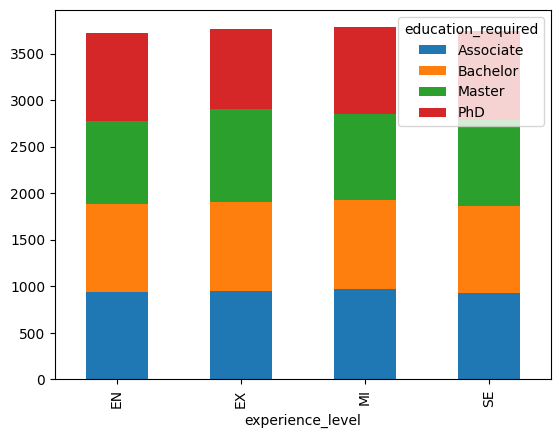

In [81]:
df.groupby(['experience_level'])['education_required'].value_counts().unstack().plot(kind='bar', stacked=True)

H1: there is a relationship between the experience level and the education required

H0: there is no relationship between the experience level and the education required

p-value > 0.05

p-value > 0.01

H1 is rejected both at 5% and at 1% level of significance, H0 is accepted.

------------

**Conclusion**

P-value: 0.1517 means there is no relations between experience_level and education_required based

**3. Calculate appropriate correlation coefficients between **any three pairs** of variables. Explain the selection of the correlation coefficient. Fill in the table below. Interpret the results. Create suitable graphs to visualize the analyzed relationships.**

Analyzing relationship between years_experience and benefits_score using Pearson correlation:
  Pearson Correlation Coefficient: -0.0073
  P-value: 0.3730
  Strength: Weak
  Direction: Negative
  Statistical Significance: Not Significant (p=0.3730 >= 0.05)


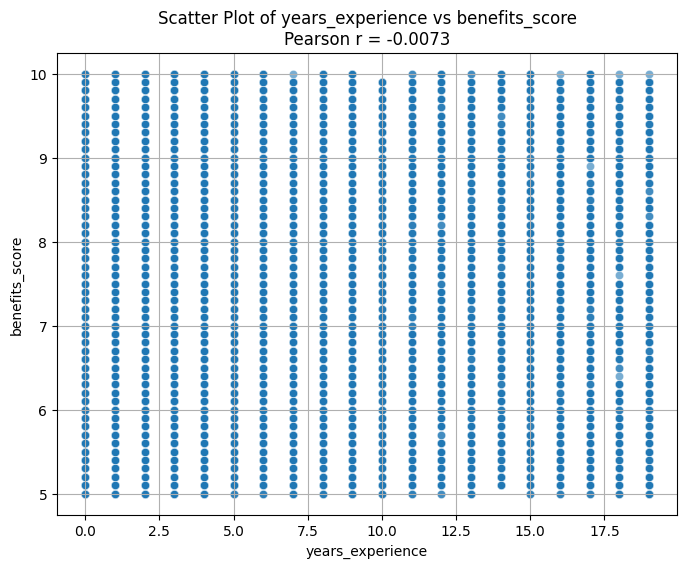

--------------------------------------------------
Analyzing relationship between salary_usd and years_experience using Pearson correlation:
  Pearson Correlation Coefficient: 0.7376
  P-value: 0.0000
  Strength: Strong
  Direction: Positive
  Statistical Significance: Significant (p=0.0000 < 0.05)


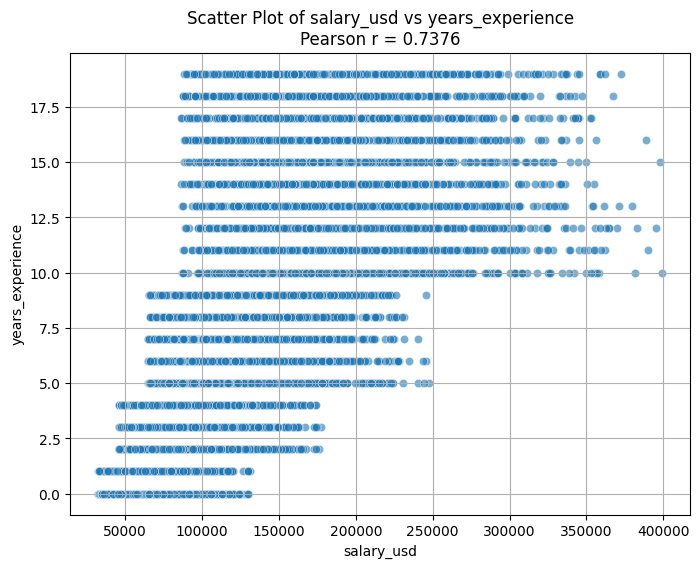

--------------------------------------------------
Analyzing relationship between salary_usd and benefits_score using Pearson correlation:
  Pearson Correlation Coefficient: 0.0010
  P-value: 0.9040
  Strength: Weak
  Direction: Positive
  Statistical Significance: Not Significant (p=0.9040 >= 0.05)


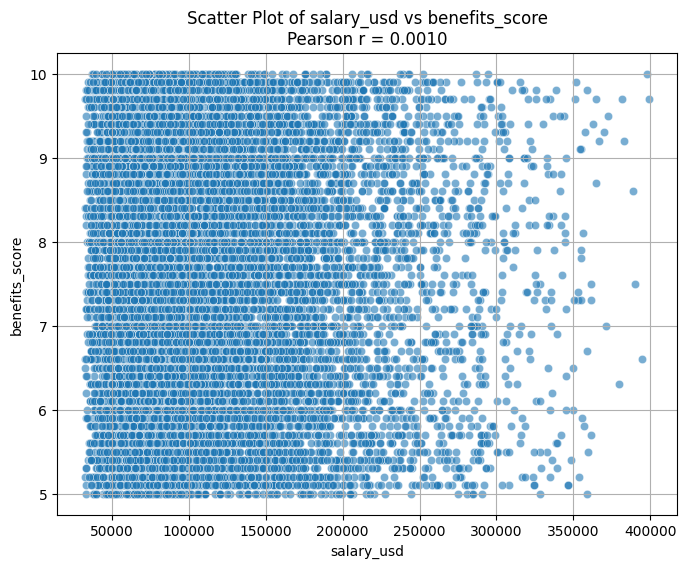

--------------------------------------------------

Correlation Analysis Results Table:


,Variables,Appropriate correlation coefficient(justification of the choice),Hypotheses,Strength of the relationship,Direction of the relationship,Statistical significance of the relationship!
0,years_experience & benefits_score,Pearson (Both are continuous interval/ratio sc...,"H0: ρ=0, H1: ρ≠0",Weak,Negative,Not Significant (p=0.3730 >= 0.05)
1,salary_usd & years_experience,Pearson (Both are continuous interval/ratio sc...,"H0: ρ=0, H1: ρ≠0",Strong,Positive,Significant (p=0.0000 < 0.05)
2,salary_usd & benefits_score,Pearson (Both are continuous interval/ratio sc...,"H0: ρ=0, H1: ρ≠0",Weak,Positive,Not Significant (p=0.9040 >= 0.05)


In [82]:
variable_pairs = [
    ('years_experience', 'benefits_score'),
    ('salary_usd', 'years_experience'),
    ('salary_usd', 'benefits_score')
]


correlation_results = []


for var1, var2 in variable_pairs:
    print(f"Analyzing relationship between {var1} and {var2} using Pearson correlation:")


    data = df[[var1, var2]].dropna()

    if len(data) < 2:
        print(f"  Not enough data points ({len(data)}) to calculate correlation for {var1} and {var2}.")
        correlation_results.append({
            'Variables': f'{var1} & {var2}',
            'Appropriate correlation coefficient(justification of the choice)': 'Pearson (Interval/Ratio Scale)',
            'Hypotheses': f'H0: ρ=0, H1: ρ≠0',
            'Strength of the relationship': 'N/A (Insufficient data)',
            'Direction of the relationship': 'N/A (Insufficient data)',
            'Statistical significance of the relationship!': 'N/A (Insufficient data)'
        })
        print("-" * 50)
        continue


    correlation_coefficient, p_value = pearsonr(data[var1], data[var2])


    abs_corr = abs(correlation_coefficient)
    if abs_corr < 0.3:
        strength = 'Weak'
    elif abs_corr < 0.7:
        strength = 'Moderate'
    else:
        strength = 'Strong'


    if correlation_coefficient > 0:
        direction = 'Positive'
    elif correlation_coefficient < 0:
        direction = 'Negative'
    else:
        direction = 'No clear direction'


    alpha = 0.05
    if p_value < alpha:
        significance = f'Significant (p={p_value:.4f} < {alpha})'
    else:
        significance = f'Not Significant (p={p_value:.4f} >= {alpha})'

    print(f"  Pearson Correlation Coefficient: {correlation_coefficient:.4f}")
    print(f"  P-value: {p_value:.4f}")
    print(f"  Strength: {strength}")
    print(f"  Direction: {direction}")
    print(f"  Statistical Significance: {significance}")



    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=var1, y=var2, alpha=0.6)
    plt.title(f'Scatter Plot of {var1} vs {var2}\nPearson r = {correlation_coefficient:.4f}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.grid(True)
    plt.show()


    correlation_results.append({
        'Variables': f'{var1} & {var2}',
        'Appropriate correlation coefficient(justification of the choice)': 'Pearson (Both are continuous interval/ratio scale variables suitable for assessing linear relationship)',
        'Hypotheses': 'H0: ρ=0, H1: ρ≠0',
        'Strength of the relationship': strength,
        'Direction of the relationship': direction,
        'Statistical significance of the relationship!': significance
    })

    print("-" * 50)

print("\nCorrelation Analysis Results Table:")
correlation_table_df = pd.DataFrame(correlation_results)
display(correlation_table_df)



| Variables | Appropriate correlation coefficient(justification of the choice) | Hypotheses | Strength of the relationship | Direction of the relationship | Statistical significance of the relationship! |
| --- | --- | --- | --- | --- | --- |
| years_experience and benefits_score  | Pearson - Both are continuous interval/ratio | H0 | weak (r= -0.0073) | negative | Not significant (p=0.3730 >= 0.05) |
| salary_usd and years_experience | Pearson - Both are continuous interval/ratio  | H1 | strong (r=0.7376) | positive | Significant (p=0.0000 < 0.05) |
| salary_usd and benefits_score | Pearson - Both are continuous interval/ratio | H0 | weak (r= 0.0010)| negative | Not Significant (p=0.9040 >= 0.05) |

**4. Calculate a paired correlation coefficient between any variables. Then calculate the partial correlation coefficient between the same pair of variables controlling for any other third variable. Interpret the results of analysis. Create suitable graphs to visualize the analyzed relationships.**

In [14]:
X1 = sm.add_constant(subset['benefits_score'])
model1 = sm.OLS(subset['salary_usd'], X1).fit()
resid_salary = model1.resid

model2 = sm.OLS(subset['years_experience'], X1).fit()
resid_experience = model2.resid

partial_corr_value, partial_pval = pearsonr(resid_salary, resid_experience)

(corr, p_val, partial_corr_value, partial_pval)


(np.float64(0.7375559086856487),
 np.float64(0.0),
 np.float64(0.7375829502790106),
 np.float64(0.0))

In [90]:
df1 = df.dropna(subset=['salary_usd', 'years_experience'])
stats.spearmanr(df1['salary_usd'], df1['years_experience'])

SignificanceResult(statistic=np.float64(0.7922798016031456), pvalue=np.float64(0.0))

In [102]:
df = df.dropna(subset=['salary_usd', 'years_experience', 'benefits_score'])
a_bc = stats.spearmanr(df['salary_usd'], df['years_experience'])[0]
a_bd = stats.spearmanr(df['salary_usd'], df['benefits_score'])[0]
a_cd = stats.spearmanr(df['years_experience'], df['benefits_score'])[0]
a_bc_d = (a_bc - a_bd * a_cd) / sqrt((1 - a_bd ** 2) * (1 - a_cd ** 2))
print('Paired correlation between salary_usd and year_experience: ',a_bc)
print('Partial correlation between salary_usd and year_experience, controlling for benefits_score: ',a_bc_d)

Paired correlation between salary_usd and year_experience:  0.7922798016031456
Partial correlation between salary_usd and year_experience, controlling for benefits_score:  0.7922755163916673


In [96]:
pg.partial_corr(data=df, x='salary_usd',
                y='years_experience', covar='job_description_length', method = 'spearman')

,n,r,CI95%,p-val
spearman,15000,0.792274,"[0.79, 0.8]",0.0


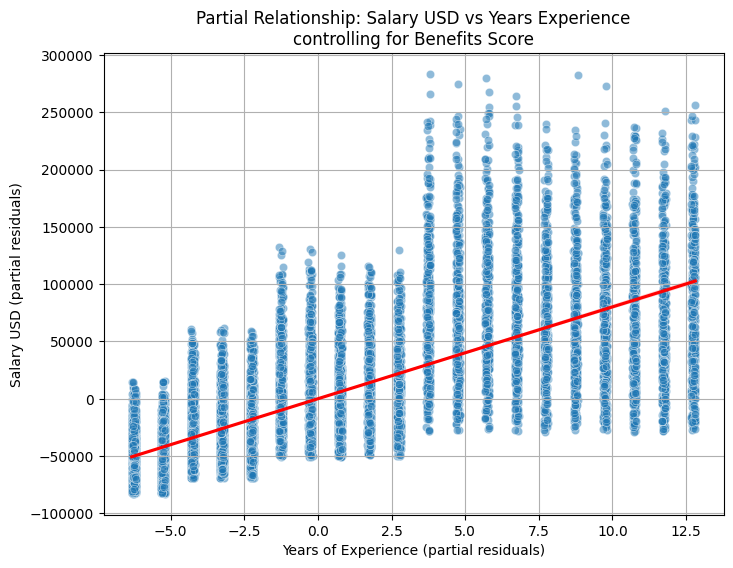

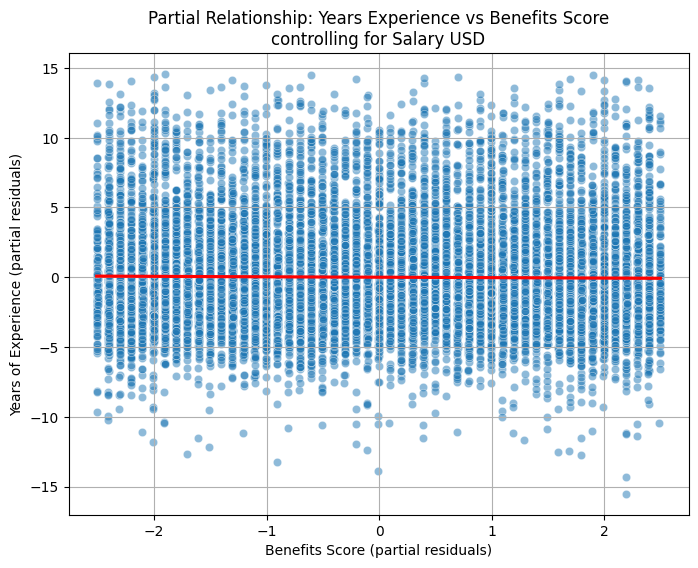

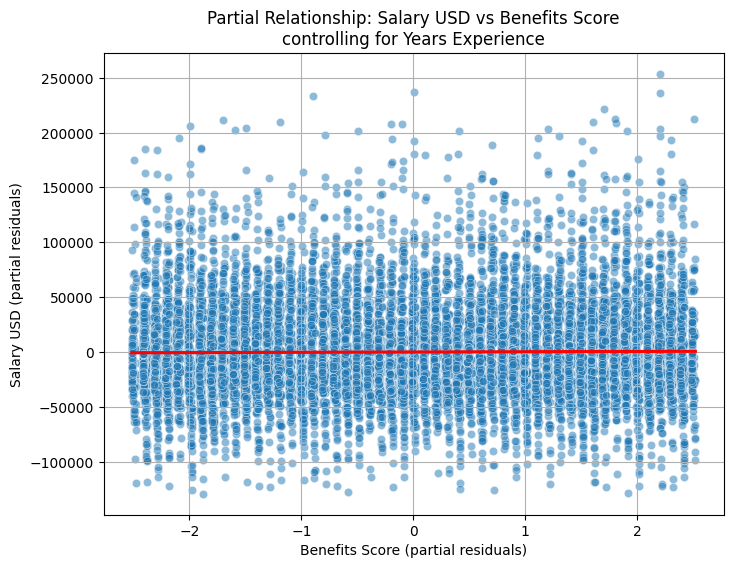

In [117]:
subset = df.dropna(subset=['salary_usd', 'years_experience', 'benefits_score'])
X1 = sm.add_constant(subset['benefits_score'])

model1 = sm.OLS(subset['salary_usd'], X1).fit()
resid_salary = model1.resid

model2 = sm.OLS(subset['years_experience'], X1).fit()
resid_experience = model2.resid

plt.figure(figsize=(8, 6))
sns.scatterplot(x=resid_experience, y=resid_salary, alpha=0.5)
sns.regplot(x=resid_experience, y=resid_salary, scatter=False, color='red')
plt.title('Partial Relationship: Salary USD vs Years Experience\ncontrolling for Benefits Score')
plt.xlabel('Years of Experience (partial residuals)')
plt.ylabel('Salary USD (partial residuals)')
plt.grid(True)
plt.show()

subset2 = df.dropna(subset=['salary_usd', 'years_experience', 'benefits_score'])
X2 = sm.add_constant(subset2['salary_usd'])

model3 = sm.OLS(subset2['years_experience'], X2).fit()
resid_experience2 = model3.resid

model4 = sm.OLS(subset2['benefits_score'], X2).fit()
resid_benefits = model4.resid

plt.figure(figsize=(8, 6))
sns.scatterplot(x=resid_benefits, y=resid_experience2, alpha=0.5)
sns.regplot(x=resid_benefits, y=resid_experience2, scatter=False, color='red')
plt.title('Partial Relationship: Years Experience vs Benefits Score\ncontrolling for Salary USD')
plt.xlabel('Benefits Score (partial residuals)')
plt.ylabel('Years of Experience (partial residuals)')
plt.grid(True)
plt.show()

subset3 = df.dropna(subset=['salary_usd', 'years_experience', 'benefits_score'])
X3 = sm.add_constant(subset3['years_experience'])

model5 = sm.OLS(subset3['salary_usd'], X3).fit()
resid_salary3 = model5.resid

model6 = sm.OLS(subset3['benefits_score'], X3).fit()
resid_benefits3 = model6.resid

plt.figure(figsize=(8, 6))
sns.scatterplot(x=resid_benefits3, y=resid_salary3, alpha=0.5)
sns.regplot(x=resid_benefits3, y=resid_salary3, scatter=False, color='red')
plt.title('Partial Relationship: Salary USD vs Benefits Score\ncontrolling for Years Experience')
plt.xlabel('Benefits Score (partial residuals)')
plt.ylabel('Salary USD (partial residuals)')
plt.grid(True)
plt.show()

r = 0.737583 = positive relationship between the two variables (salary and years of experience).

CI95% = [0.79, 0.8] = CI95% confident that the true correlation lies between 0.79 and 0.8

p-val = 0.0 = correlation is significant.